# IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

# DATA INGESTION

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# DATA CLEANING AND TRANSFORMATION

## Checking information about given dataset

In [3]:
# Finding number of rows and columns
df.shape

(1338, 7)

In [4]:
# Checking statistical description about given dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Finding other general informations & summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Checking data types of columns

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# you might consider converting sex,smoker, region --> to a categorical data type using pd.Categorical. 
# This can save memory and improve performance for certain operations.

df['sex'] = pd.Categorical(df['sex'])  # Convert sex to categorical
df['smoker'] = pd.Categorical(df['smoker'])  # Convert smoker to categorical
df['region'] = pd.Categorical(df['region'])  # Convert region to categorical

In [8]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## Checking duplicates in data

In [9]:
# checking duplicate rows
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# removing duplicate rows
df = df.drop_duplicates()

In [11]:
#rechecking duplicate rows
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [12]:
# checking duplicate columns
df.columns[df.T.duplicated()].tolist()

[]

In [13]:
# removing duplicate columns... if somehow it existed

#duplicate_columns = df.columns[df.T.duplicated()].tolist()
#df = df.drop(columns=duplicate_columns)

## Handling Null Values

In [14]:
# Checking existance of null rows(having nulls in all column)
df[df.isnull().all(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [15]:
# Removing null rows .. if some how it existed
# df = df.dropna(how='all')

In [16]:
# Checking existance of any nulls in any row
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
# removing rows having any nulls
# df= df.dropna()

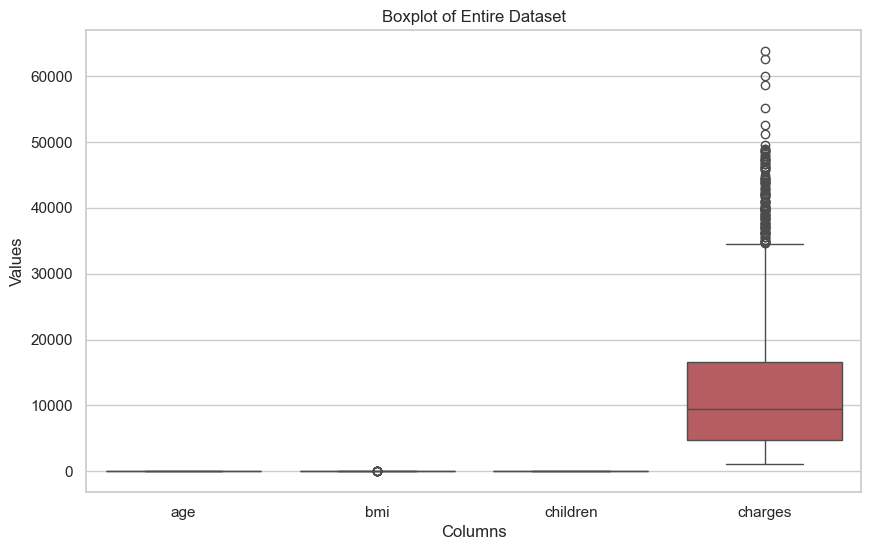

In [18]:
# making boxplot to find outliers

# Use Seaborn for styling (optional)
sns.set(style="whitegrid")

# Create a boxplot for the entire dataset
plt.figure(figsize=(10, 6))  # Set the size of the figure (optional)
sns.boxplot(data=df)

# Set labels and title
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Boxplot of Entire Dataset")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Boxplot of bmi')

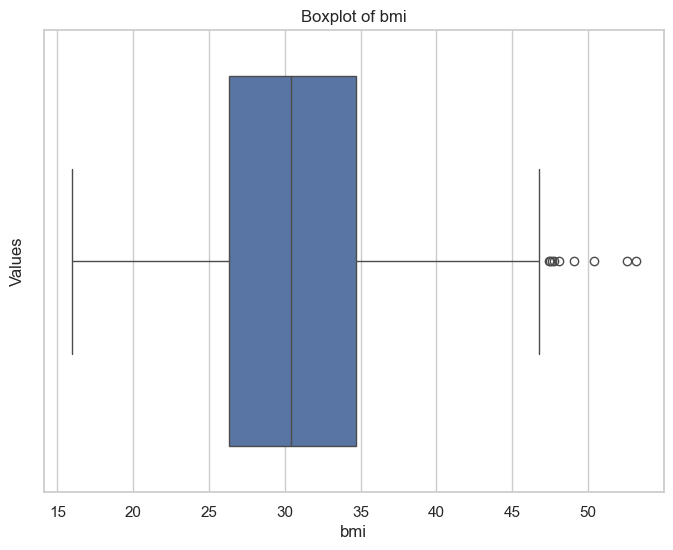

In [19]:
# Create a boxplot
plt.figure(figsize=(8, 6))  # Set the size of the figure (optional)
sns.boxplot(x=df['bmi'])

# Set labels and title
plt.xlabel('bmi')
plt.ylabel("Values")
plt.title(f"Boxplot of bmi")

In [20]:
# Replace missing values with mean for columns which do not have outliers - Eg- df['age'] 
#df['age'] = df['age'].fillna(df['age'].mean())

# Replace missing values with median for columns which have outliers - Eg- df['bmi'] 
# df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Replace missing values with mode for categorical columns - Eg- df['region'] 
# df['region'] = df['region'].fillna(df['region'].mode()[0])

In [21]:
df.to_csv("new_insurance.csv", index=False)

## Find the number of unique values in each column

In [22]:
unique_values_per_column = df.nunique()

# Display the result
print("Number of unique values in each column:")
print(unique_values_per_column)

Number of unique values in each column:
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


# EDA

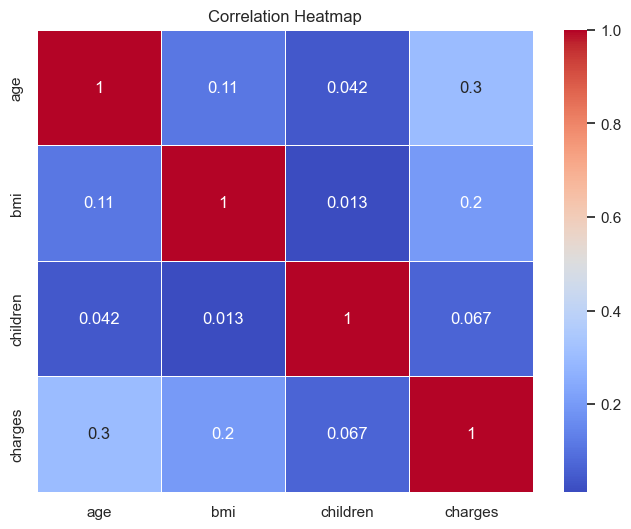

In [23]:
# Calculate the correlation matrix
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

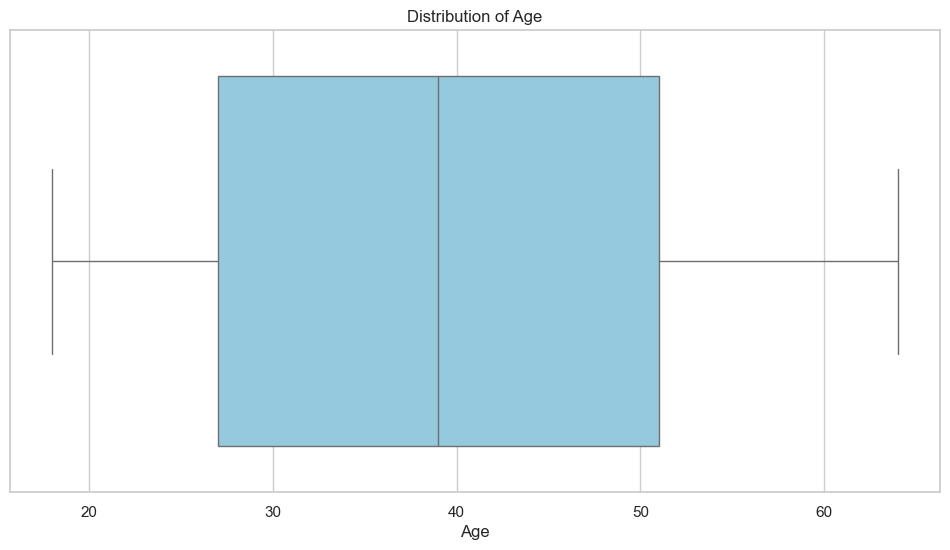

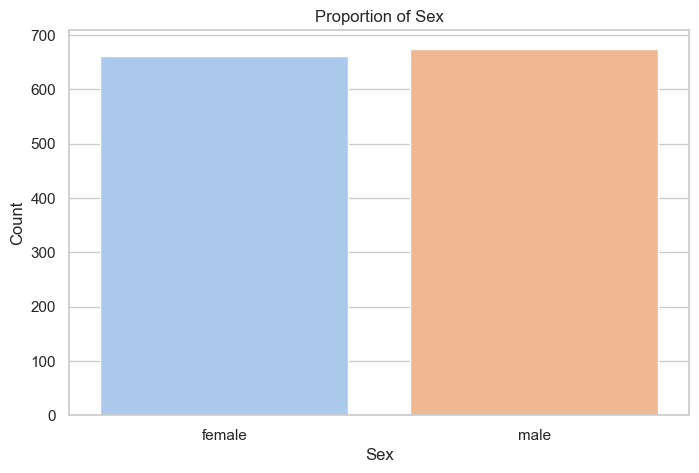

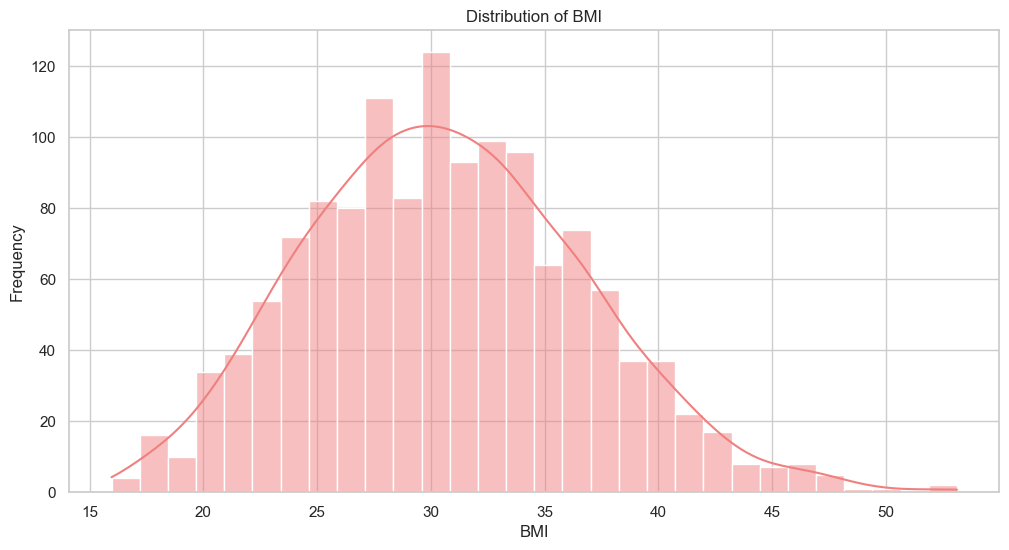

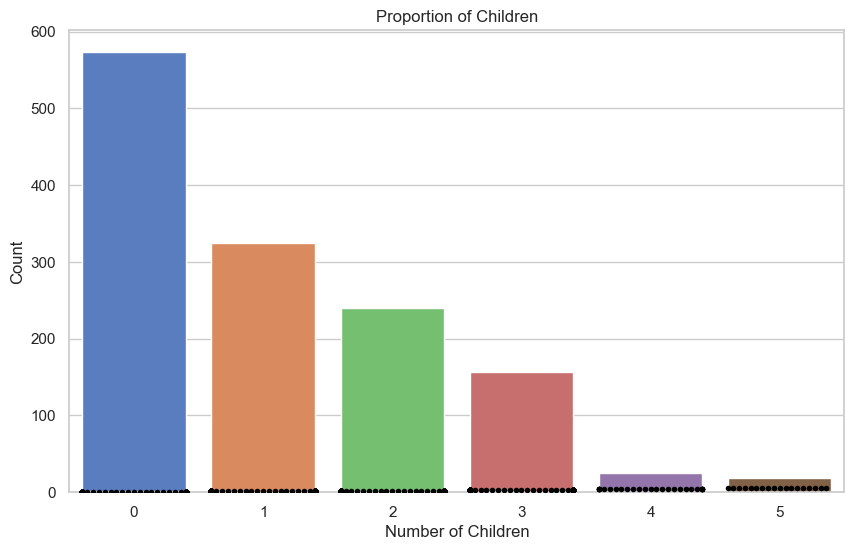

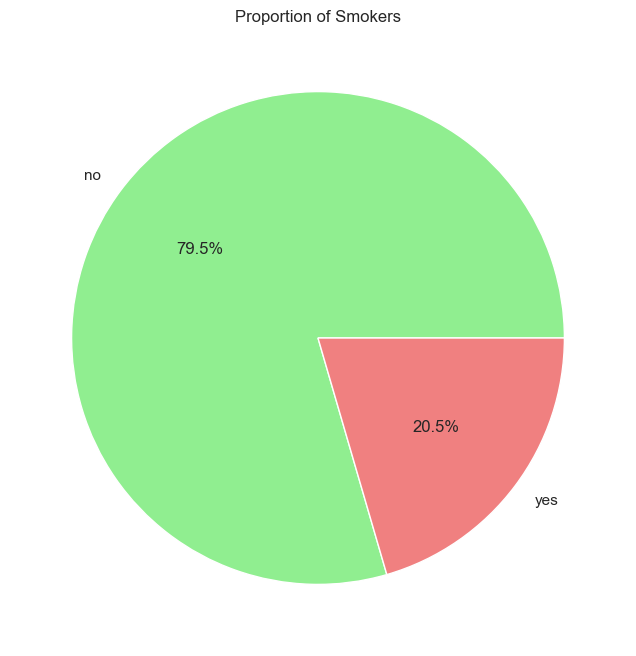

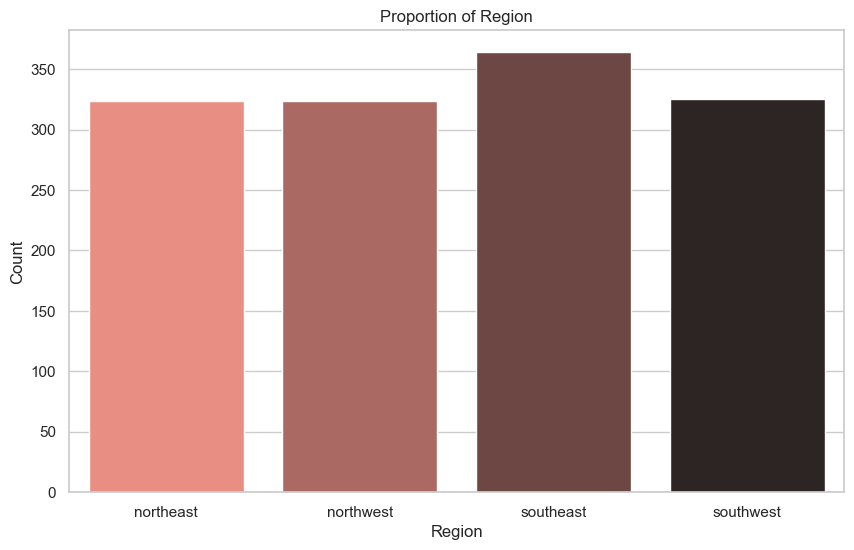

In [24]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Distribution of Age (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# Proportion of Sex (Count Plot)
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Proportion of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Distribution of BMI (Histogram with KDE)
plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Proportion of Children (Bar Plot with Swarm Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=df, palette='muted')
sns.swarmplot(x='children', y='children', data=df, color='black', size=4)
plt.title('Proportion of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

# Proportion of Smoker (Pie Chart)
smoker_counts = df['smoker'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Smokers')
plt.show()

# Proportion of Region (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, palette='dark:salmon_r')
plt.title('Proportion of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

## Hypothesis Testing

In [25]:
# Categorical vs. Categorical: Chi-square test can be used for variables like "Sex," "Smoker," and "Region" to assess their association with each other and potentially with "Charges."

#Numerical vs. Numerical: Linear regression analysis can be used for variables like "Age," "BMI," and "Children" to analyze their relationship with "Charges."

#Categorical vs. Numerical: T-tests, ANOVA, or regression analysis can be used depending on the nature of the categorical variable.

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# For simplicity, I'm assuming you want to predict 'charges'

# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# Linear Regression for Age
X_age = sm.add_constant(df['age'])
model_age = sm.OLS(df['charges'], X_age).fit()
print("Linear Regression for Age:")
#print(model_age.summary())
if model_age.pvalues['age'] < 0.05:
    print("Interpretation: The p-value for age is below 0.05, indicating a significant relationship. As age increases, charges tend to increase.")
else:
    print("Interpretation: The p-value for age is not below 0.05, indicating no significant relationship with charges.")

# T-test for Sex
sex_grouped = df.groupby('sex')['charges'].apply(list)
t_stat_sex, p_value_sex = ttest_ind(sex_grouped[0], sex_grouped[1])
print("\nT-test for Sex:")
#print(f"T-statistic = {t_stat_sex}, p-value = {p_value_sex}")
if p_value_sex < 0.05:
    print("Interpretation: The p-value for sex is below 0.05, suggesting that sex may not be a significant predictor of charges.")
else:
    print("Interpretation: The p-value for sex is not below 0.05, suggesting a potential association between sex and charges.")

# Linear Regression for BMI
X_bmi = sm.add_constant(df['bmi'])
model_bmi = sm.OLS(df['charges'], X_bmi).fit()
print("\nLinear Regression for BMI:")
#print(model_bmi.summary())
if model_bmi.pvalues['bmi'] < 0.05:
    print("Interpretation: The p-value for BMI is below 0.05, indicating a significant relationship. Higher BMI is associated with higher charges.")
else:
    print("Interpretation: The p-value for BMI is not below 0.05, suggesting no significant relationship with charges.")

# Linear Regression for Children
X_children = sm.add_constant(df['children'])
model_children = sm.OLS(df['charges'], X_children).fit()
print("\nLinear Regression for Children:")
#print(model_children.summary())
if model_children.pvalues['children'] < 0.05:
    print("Interpretation: The p-value for children is below 0.05, suggesting that the number of children has a significant impact on charges.")
else:
    print("Interpretation: The p-value for children is not below 0.05, suggesting no significant impact on charges.")

# T-test for Smoker
smoker_grouped = df.groupby('smoker')['charges'].apply(list)
t_stat_smoker, p_value_smoker = ttest_ind(smoker_grouped[0], smoker_grouped[1])
print("\nT-test for Smoker:")
#print(f"T-statistic = {t_stat_smoker}, p-value = {p_value_smoker}")
if p_value_smoker < 0.05:
    print("Interpretation: The p-value for smoker is very low, indicating a significant difference in charges between smokers and non-smokers.")
else:
    print("Interpretation: The p-value for smoker is not below 0.05, suggesting no significant difference in charges between smokers and non-smokers.")

# ANOVA for Region
f_stat_region, p_value_region = f_oneway(df['charges'][df['region'] == 0],
                                          df['charges'][df['region'] == 1],
                                          df['charges'][df['region'] == 2],
                                          df['charges'][df['region'] == 3])
print("\nANOVA for Region:")
#print(f"F-statistic = {f_stat_region}, p-value = {p_value_region}")
if p_value_region < 0.05:
    print("Interpretation: The p-value for region is below 0.05, indicating that there is a significant difference in charges across different regions.")
else:
    print("Interpretation: The p-value for region is not below 0.05, suggesting no significant difference in charges across different regions.")

Linear Regression for Age:
Interpretation: The p-value for age is below 0.05, indicating a significant relationship. As age increases, charges tend to increase.

T-test for Sex:
Interpretation: The p-value for sex is below 0.05, suggesting that sex may not be a significant predictor of charges.

Linear Regression for BMI:
Interpretation: The p-value for BMI is below 0.05, indicating a significant relationship. Higher BMI is associated with higher charges.

Linear Regression for Children:
Interpretation: The p-value for children is below 0.05, suggesting that the number of children has a significant impact on charges.

T-test for Smoker:
Interpretation: The p-value for smoker is very low, indicating a significant difference in charges between smokers and non-smokers.

ANOVA for Region:
Interpretation: The p-value for region is below 0.05, indicating that there is a significant difference in charges across different regions.


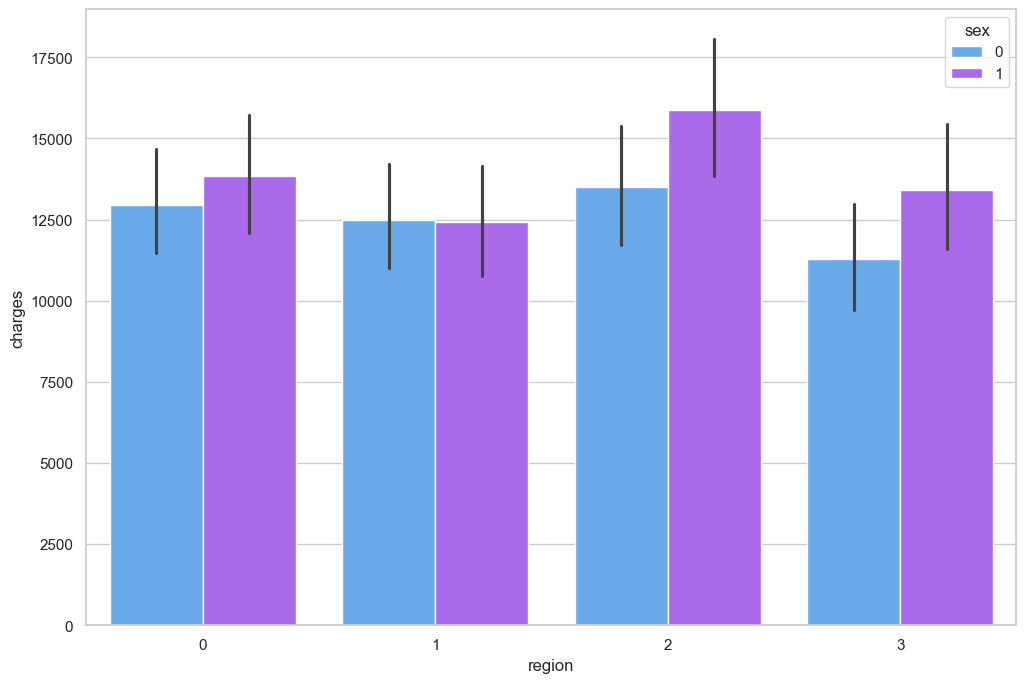

In [27]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

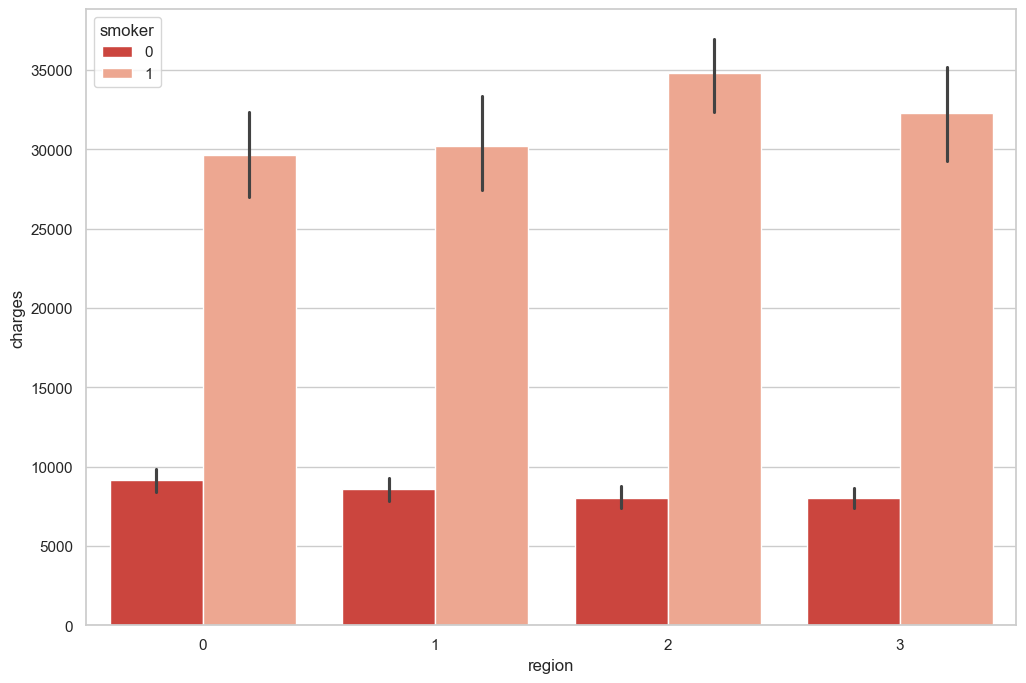

In [28]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

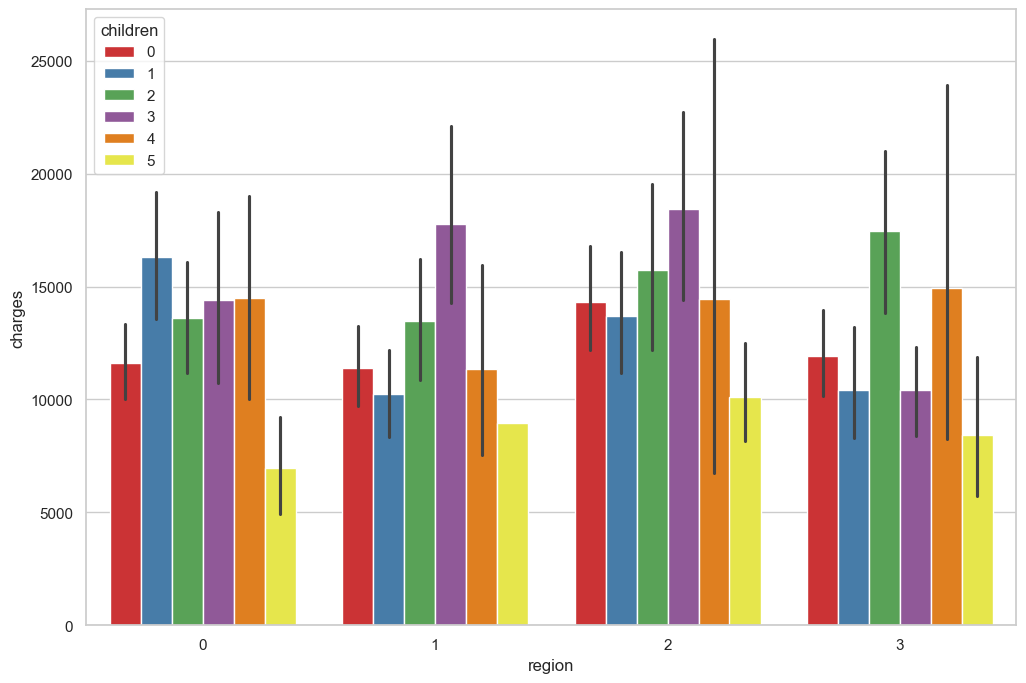

In [29]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

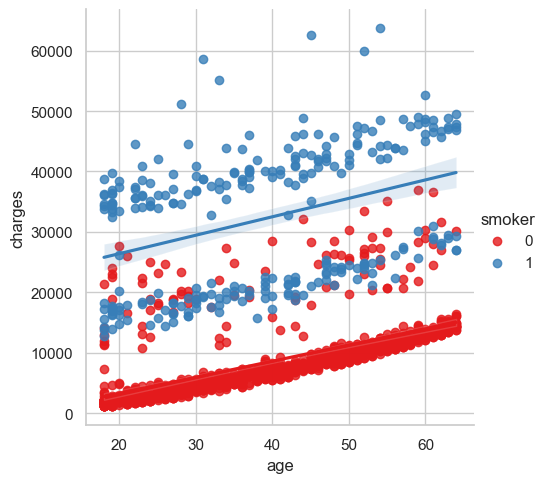

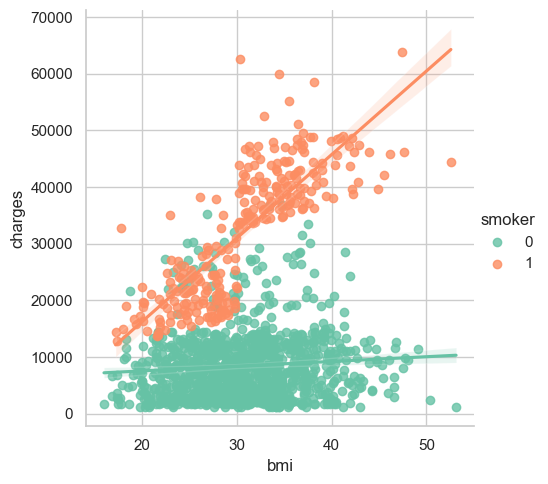

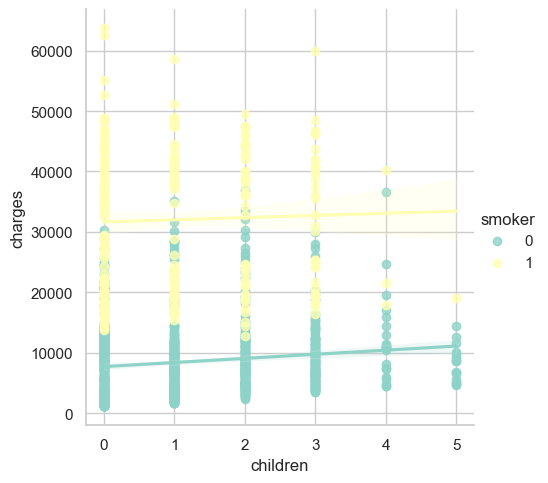

In [30]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

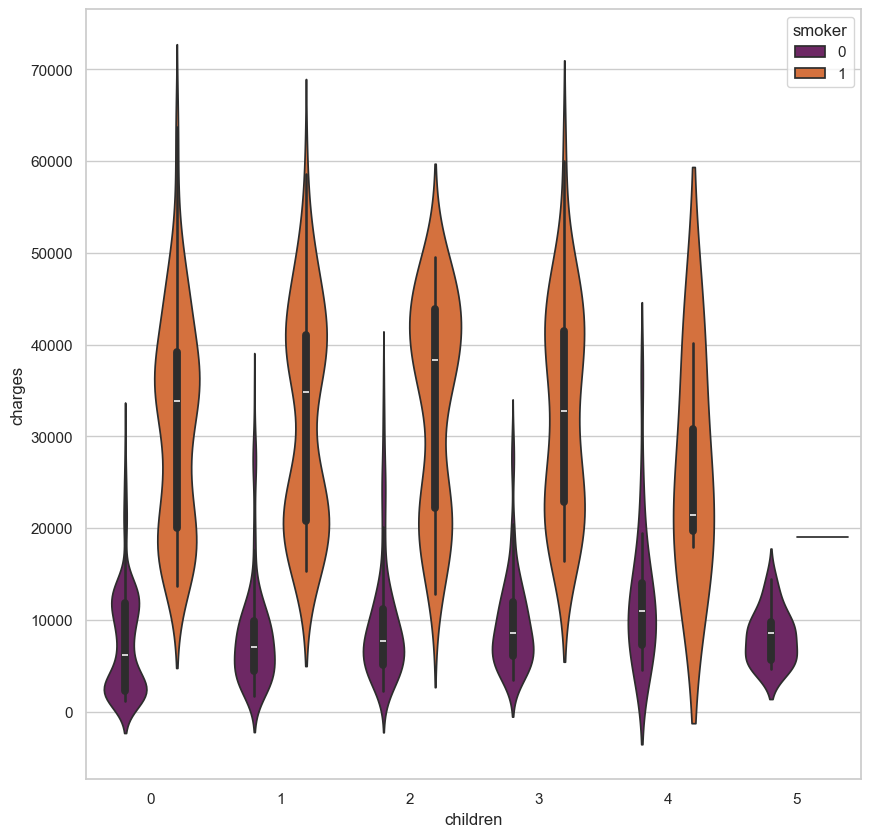

In [31]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [32]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [40]:
##Converting category labels into numerical using LabelEncoder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['sex'] = label_encoder.fit_transform(df['sex'])
# Assuming df is your DataFrame
df = pd.get_dummies(df, columns=['region'])
# Renaming the columns
df.rename(columns={
    'region_0': 'region_northeast',
    'region_1': 'region_northwest',
    'region_2': 'region_southeast',
    'region_3': 'region_southwest'
}, inplace=True)
df.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [41]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


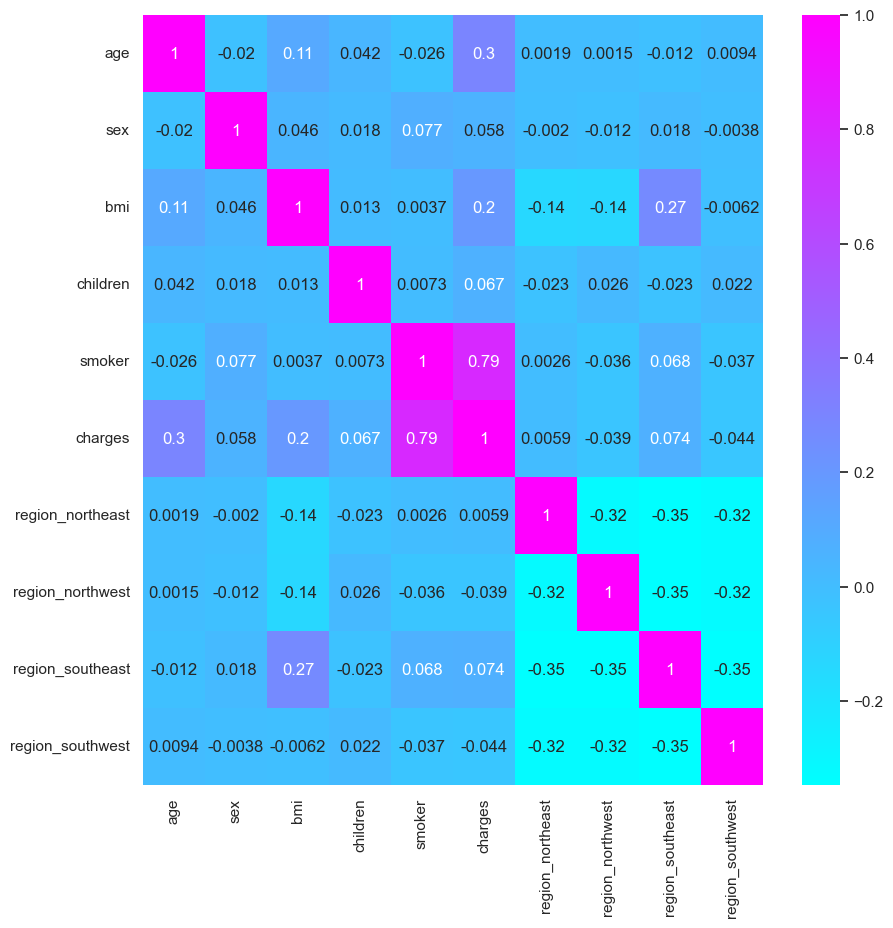

In [42]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import pandas as pd

# Assuming df is your DataFrame with features and target variable

x = df.drop(['charges'], axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Define regressors
regressors = {
    'Linear Regressor': LinearRegression(),
    'Ridge Regressor': Ridge(alpha=0.5),
    'Lasso Regressor': Lasso(alpha=0.2),
    'Elasticnet Regressor': ElasticNet(alpha=20.0),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1),
    'Polynomial Regressor': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Perform model selection
best_regressor = None
best_score = float('-inf')  # Initialize with negative infinity

for name, reg in regressors.items():
    reg.fit(x_train, y_train)
    y_test_pred = reg.predict(x_test)
    
    mse = metrics.mean_squared_error(y_test_pred, y_test)
    r2 = metrics.r2_score(y_test_pred, y_test)
    
    # Calculate adjusted R²
    n = len(y_test)  # Number of samples in the test set
    p = x_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    print(f'\nRegressor: {name}')
    print(f'\nMSE: {mse}')
    print(f'\nR² Score: {r2}')
    print(f'\nAdjusted R² Score: {adjusted_r2}')

    score = adjusted_r2

    if score > best_score:
        best_score = score
        best_regressor = reg

    print("*" * 100)

# Now best_regressor holds the best model based on the adjusted R² score
print(f'\nBest Regressor: {best_regressor.__class__.__name__}')
print(f'\nBest Adjusted R² Score: {best_score}')


Regressor: Linear Regressor

MSE: 41546216.660868414

R² Score: 0.6426963634468181

Adjusted R² Score: 0.6302322831019397
****************************************************************************************************

Regressor: Ridge Regressor

MSE: 41555406.9617129

R² Score: 0.6408509405438416

Adjusted R² Score: 0.6283224849814175
****************************************************************************************************

Regressor: Lasso Regressor

MSE: 41546278.543339625

R² Score: 0.642666442347239

Adjusted R² Score: 0.6302013182430729
****************************************************************************************************

Regressor: Elasticnet Regressor

MSE: 138810947.59234545

R² Score: -10.86569285097829

Adjusted R² Score: -11.279612369035672
****************************************************************************************************

Regressor: Random Forest Regressor

MSE: 27259313.599337745

R² Score: 0.8045867487427691

Adjusted R² 

In [44]:
reg = RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1)

In [45]:
import pickle
pickle.dump(best_regressor, open('insurance_charges_model.p', 'wb'))